In [344]:
import spectral_analysis as sa
import numpy as np
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

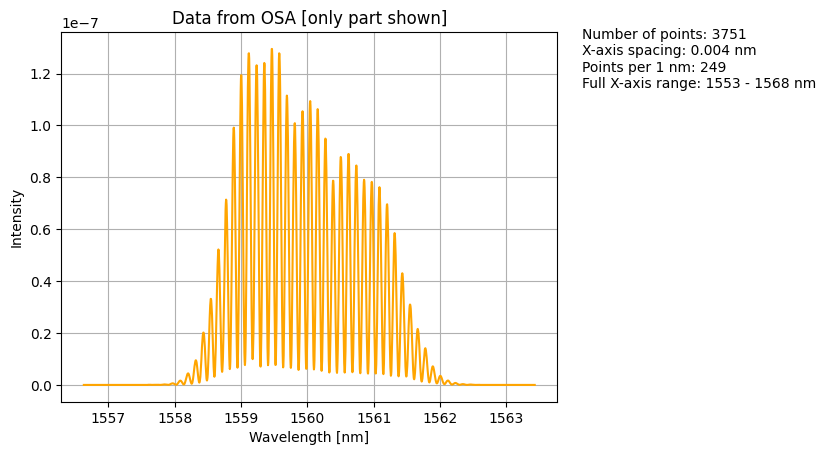

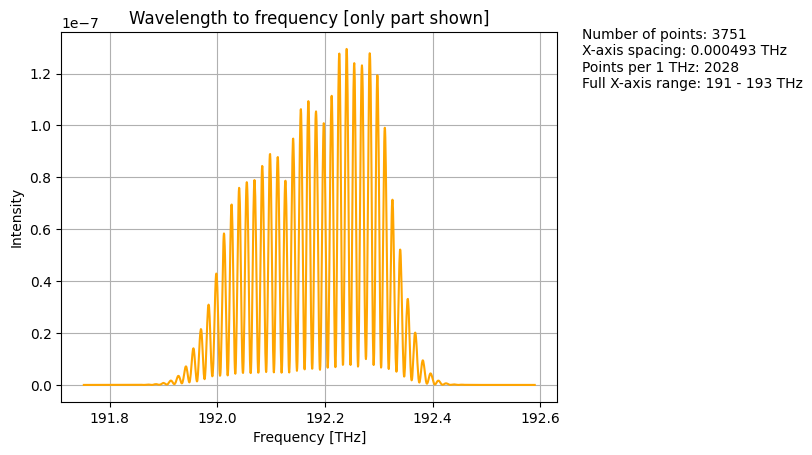

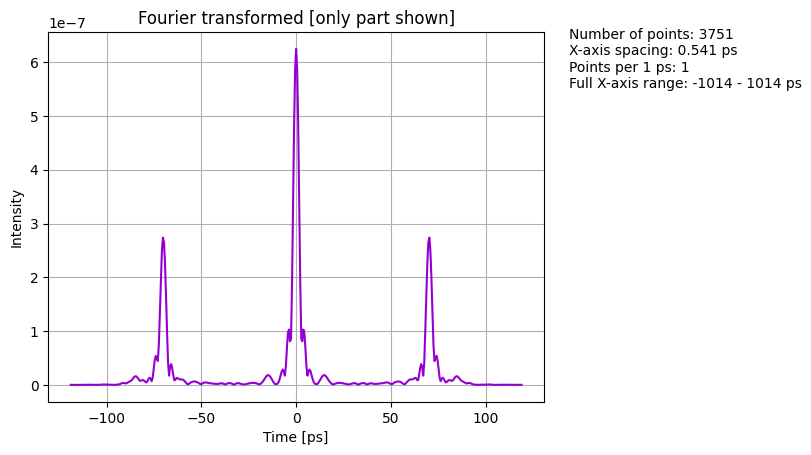

2019
2047


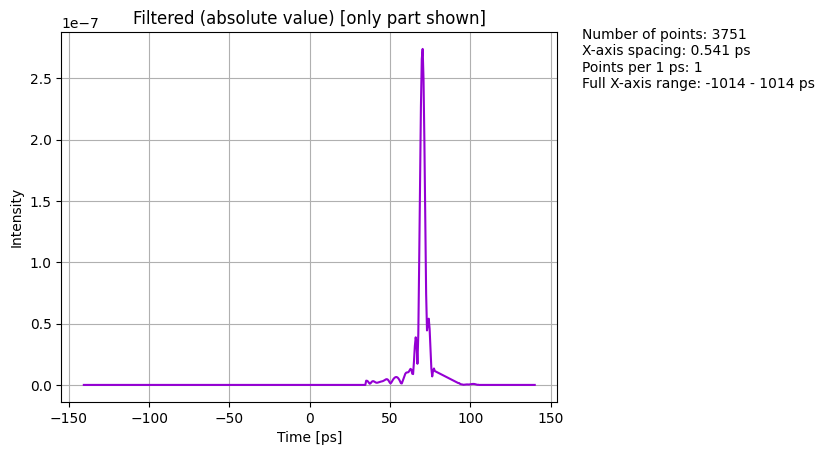

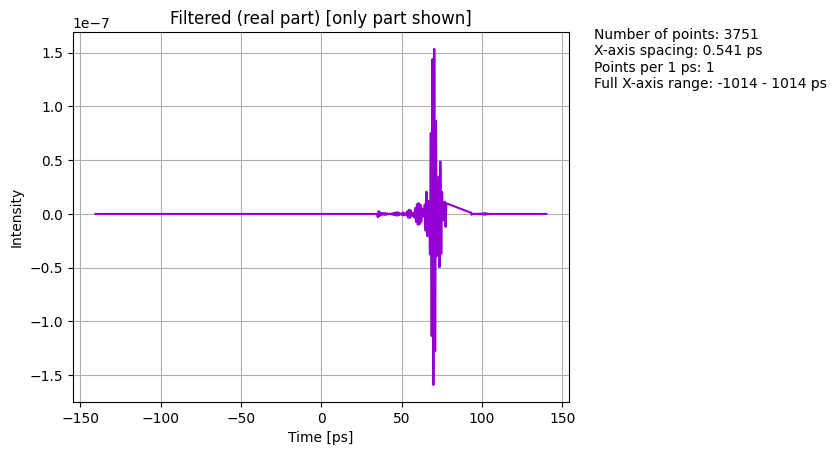

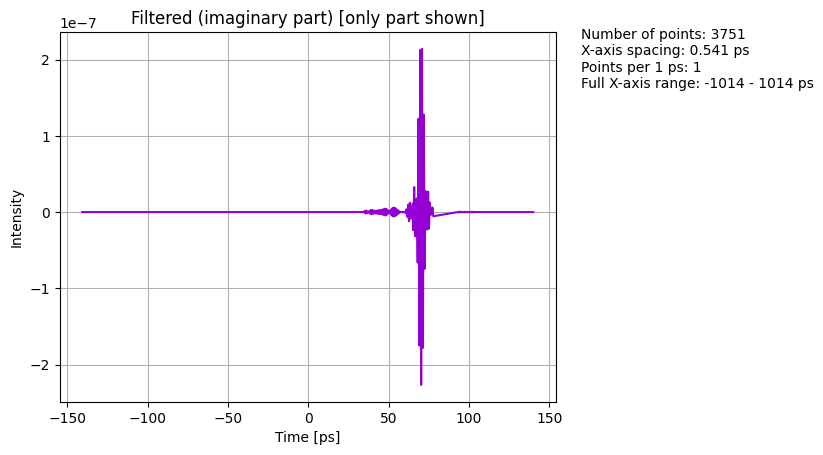

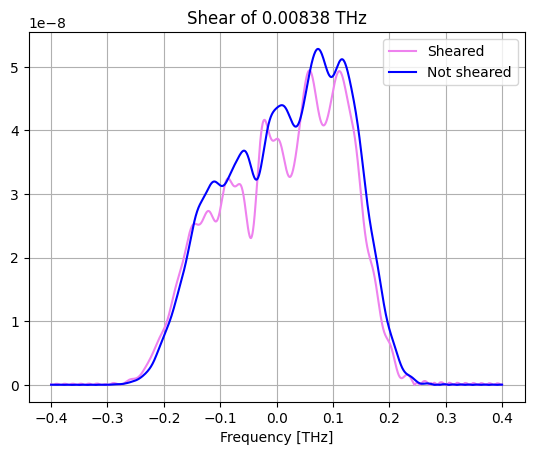

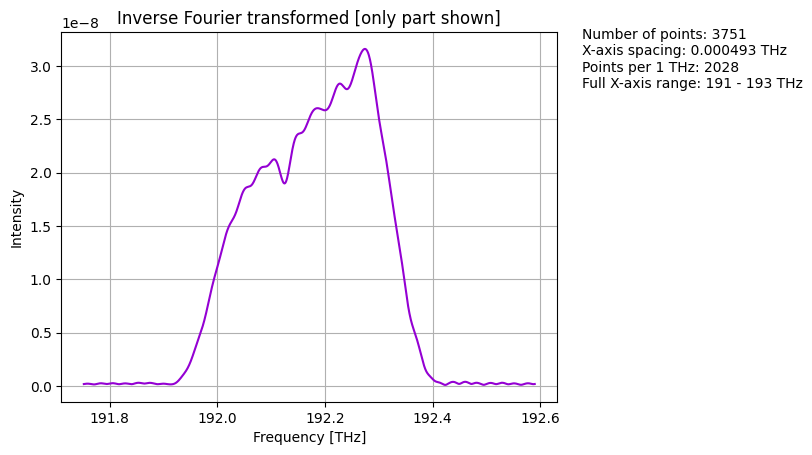

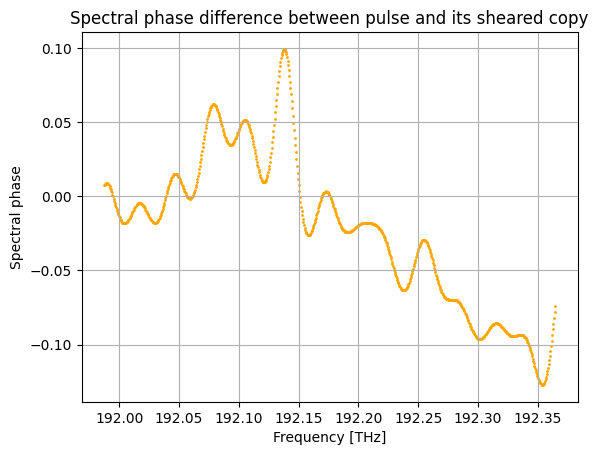

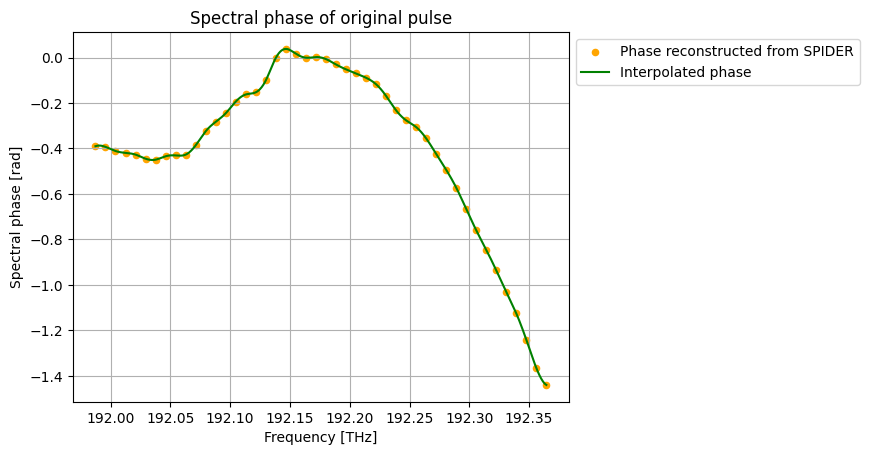

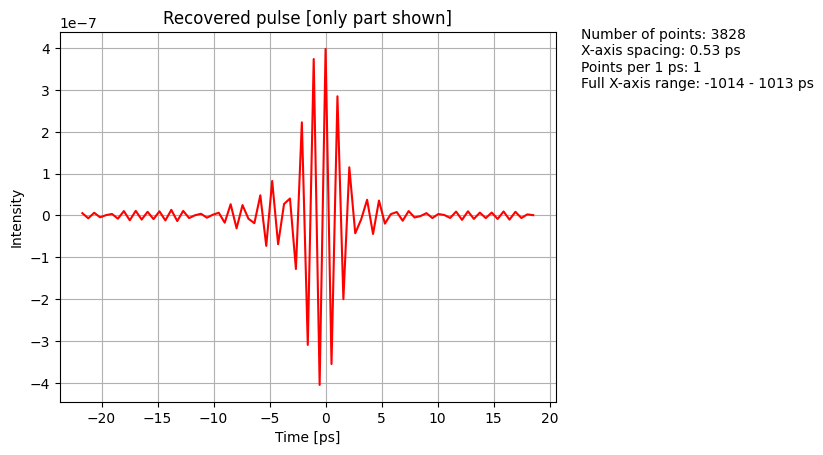

In [345]:
phase40_extr_ls = sa.spider("data/40um_p_spectrum.csv",
            "data/40um_t_spectrum.csv",
            plot_steps = True,
            find_shear = "least squares",
            smoothing_period = None,#0.065,
            sheared_is_bigger=False,
            plot_shear = True,
            plot_pulse = True,
            plot_phase = True,
            what_to_return = "phase")[1]

2019
2047


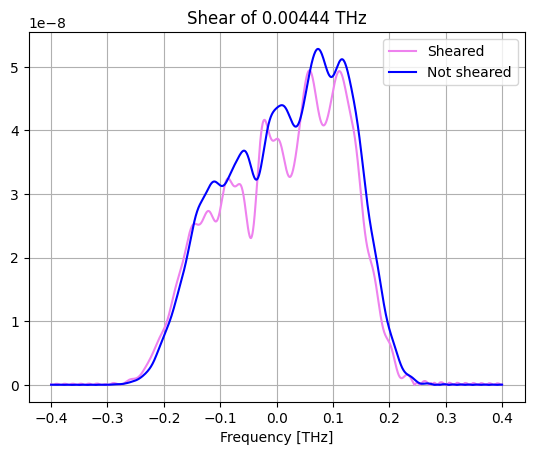

In [346]:
phase40_extr_com = sa.spider("data/40um_p_spectrum.csv",
            "data/40um_t_spectrum.csv",
            plot_steps = False,
            find_shear = "center of mass",
            smoothing_period = 0.065,
            plot_shear = True,
            sheared_is_bigger = False,
            plot_phase = False,
            what_to_return = "phase")[1]

In [347]:
sheared40 = sa.load_csv("data/40um_sheared.csv")
not_sheared40 = sa.load_csv("data/40um_not_sheared.csv")
sheared40.wl_to_freq()
not_sheared40.wl_to_freq()

shear40 = sheared40.quantile(1/2)-not_sheared40.quantile(1/2)

phase40_meas = sa.spider("data/40um_p_spectrum.csv",
            "data/40um_t_spectrum.csv",
            plot_steps = False,
            smoothing_period = 0.065,
            shear = np.abs(shear40),
            plot_shear = True,
            plot_phase = False,
            sheared_is_bigger = False,
            what_to_return = "phase")[1]

2019
2047


2019
2047


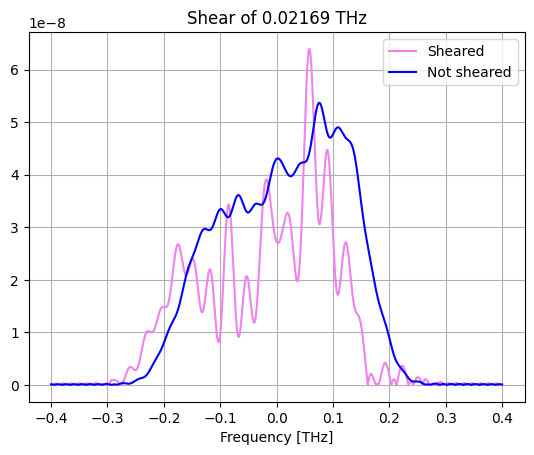

In [348]:
phase80_extr_ls = sa.spider("data/80um_p_spectrum.csv",
            "data/80um_t_spectrum.csv",
            plot_steps = False,
            smoothing_period = 0.065,
            find_shear = "least squares",
            plot_shear = True,
            plot_pulse = False,
            plot_phase = False,
            sheared_is_bigger = False,
            what_to_return = "phase")[1]

2019
2047


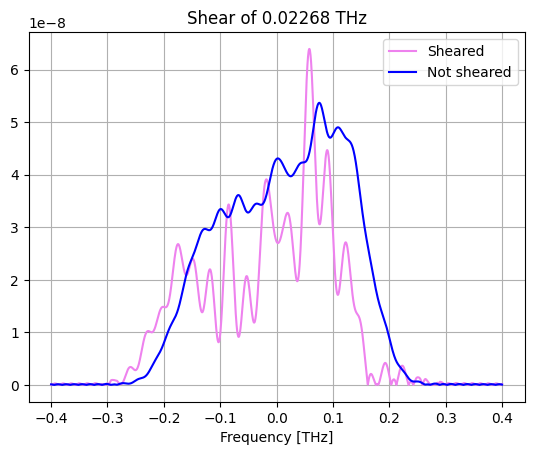

In [349]:
phase80_extr_com = sa.spider("data/80um_p_spectrum.csv",
            "data/80um_t_spectrum.csv",
            plot_steps = False,
            smoothing_period = 0.065,
            find_shear = "center of mass",
            plot_shear = True,
            plot_pulse = False,
            plot_phase = False,
            sheared_is_bigger = False,
            what_to_return = "phase")[1]

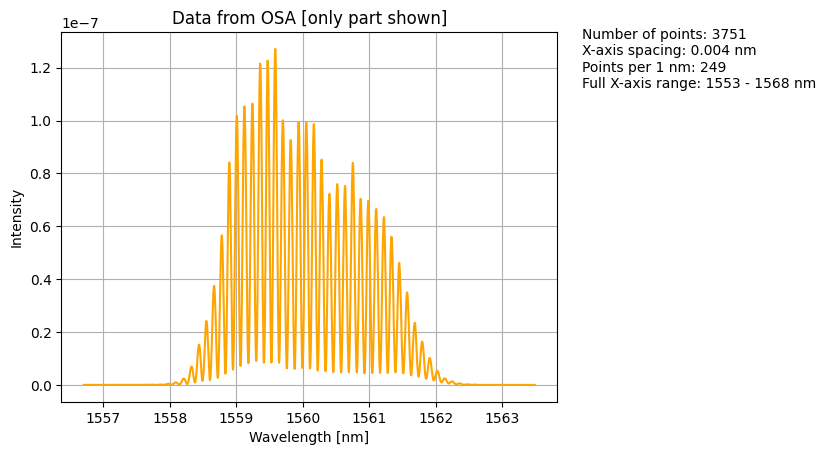

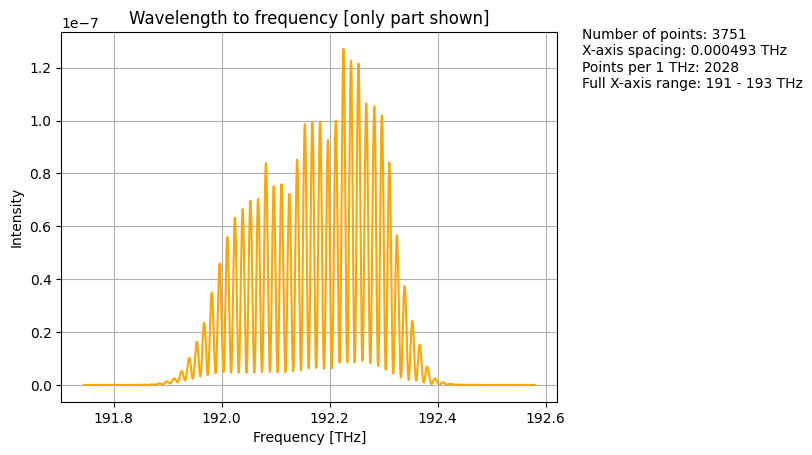

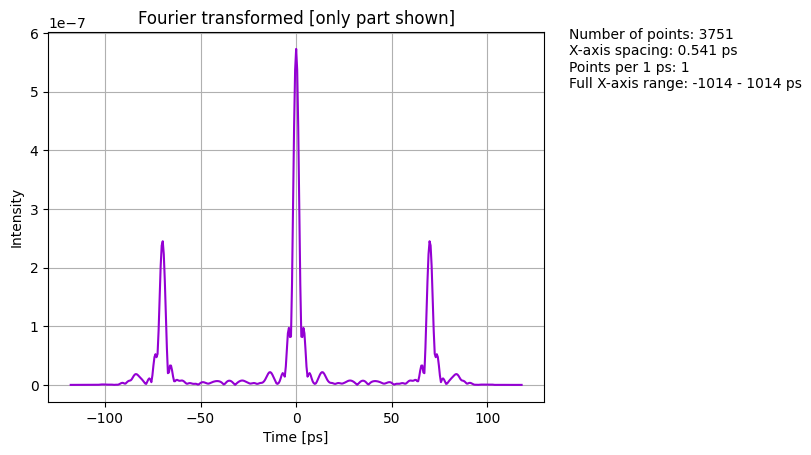

2019
2047


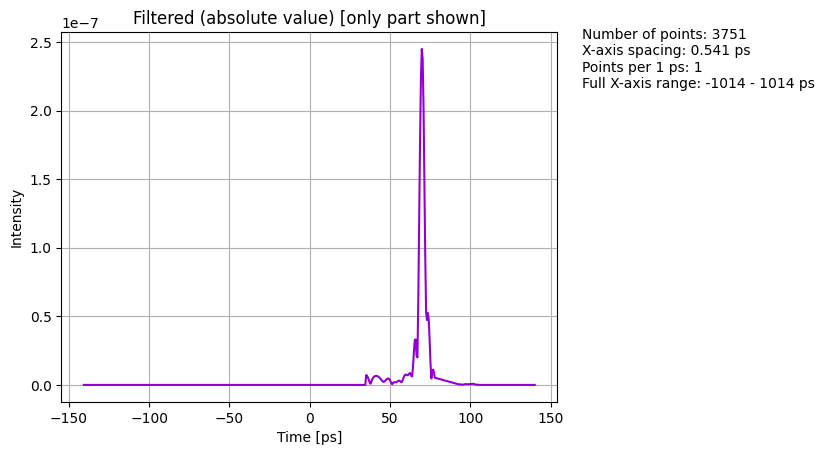

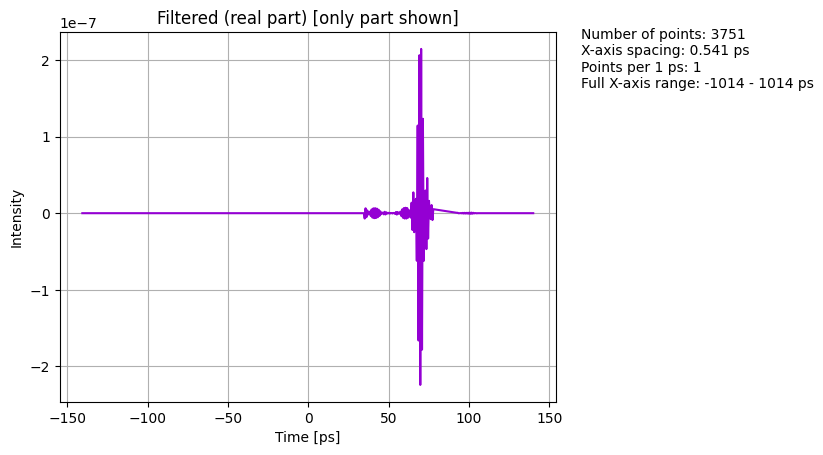

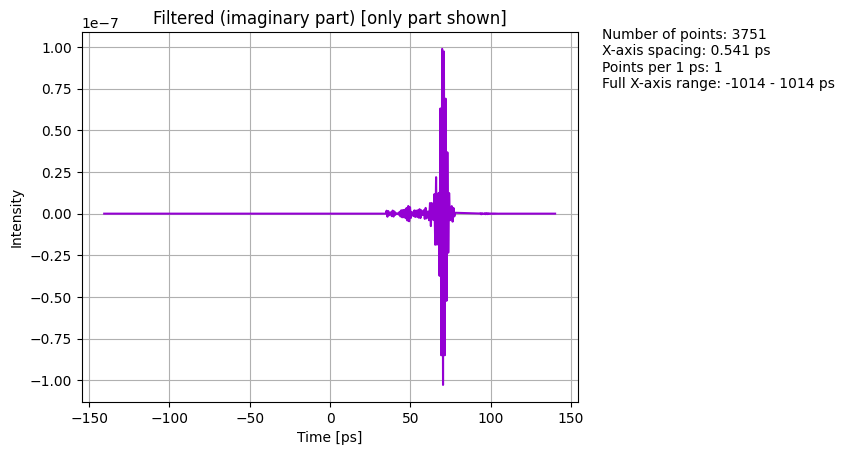

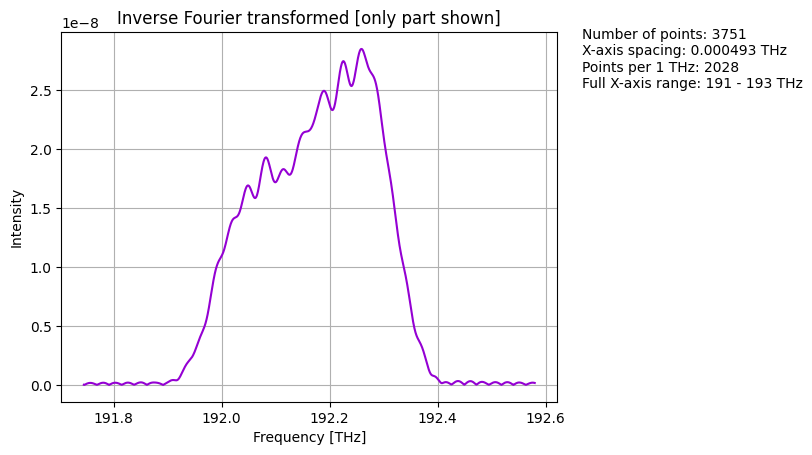

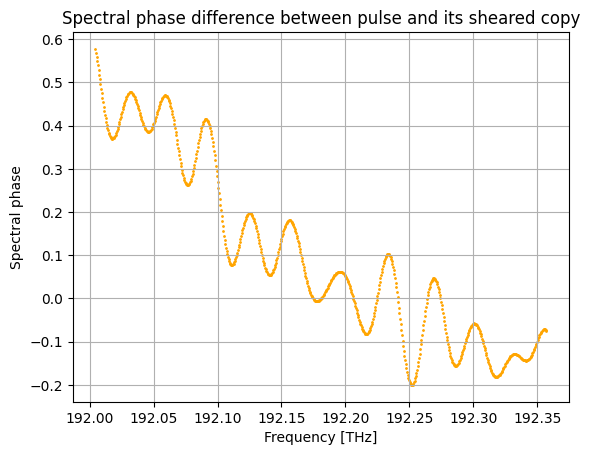

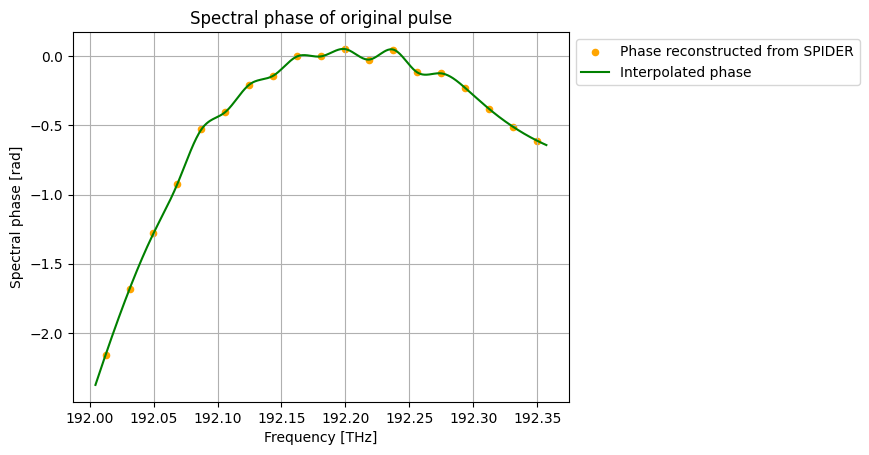

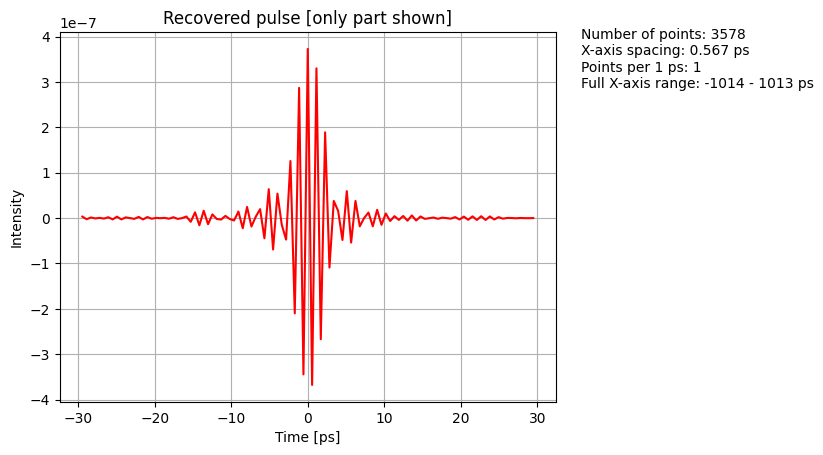

In [350]:
sheared80 = sa.load_csv("data/80um_sheared.csv")
not_sheared80 = sa.load_csv("data/80um_not_sheared.csv")
sheared80.wl_to_freq()
not_sheared80.wl_to_freq()

shear80 = sheared80.quantile(1/2)-not_sheared80.quantile(1/2)

phase80_meas = sa.spider("data/80um_p_spectrum.csv",
            "data/80um_t_spectrum.csv",
            plot_steps = True,
            smoothing_period = None,#0.065,
            shear = np.abs(shear80),
            sheared_is_bigger = False,
            plot_shear = False,
            plot_pulse = True,
            plot_phase = True,
            what_to_return = "phase")[1]

In [351]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

omega = np.linspace(192.02, 192.35, 1000)
omega_mean = 192.17
fiber_length = 82
phase = -phase(omega, omega_mean, fiber_length)

sim_phase = sa.spectrum(omega, phase, x_type = "freq", y_type = "phase")
#sa.plot(sim_phase, what_to_plot = "real")

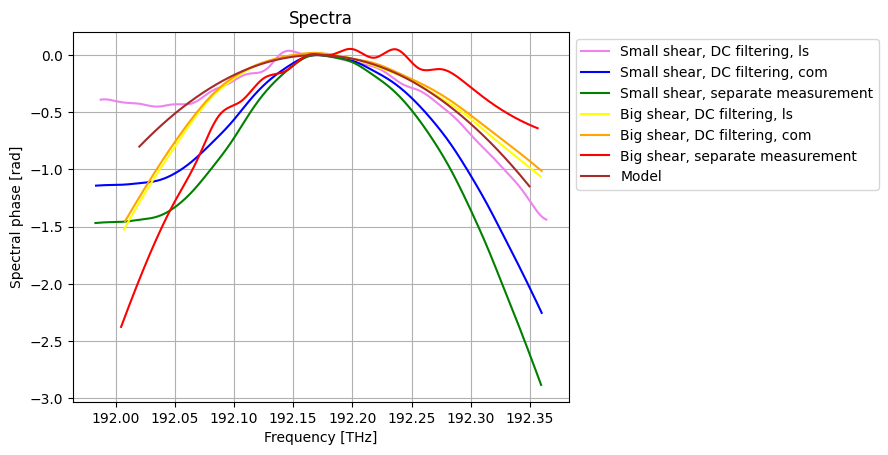

In [352]:
sa.compare_plots([phase40_extr_ls, phase40_extr_com, phase40_meas, phase80_extr_ls, phase80_extr_com, phase80_meas, sim_phase],
legend = ["Small shear, DC filtering, ls", "Small shear, DC filtering, com", "Small shear, separate measurement", "Big shear, DC filtering, ls",  "Big shear, DC filtering, com", "Big shear, separate measurement", "Model"])